In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

### Generate synthetic data with four clusters in a 3D space

In [3]:
# CLuster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

### Display the data in an interactive Plotly 3D scatter plot

In [4]:
# Create a DataFrame for Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str) ,  opacity=0.7,  color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

Standardize the data to prepare it for the three projection methods

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply t-SNE to reduce the dimensionality to 2D

In [7]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

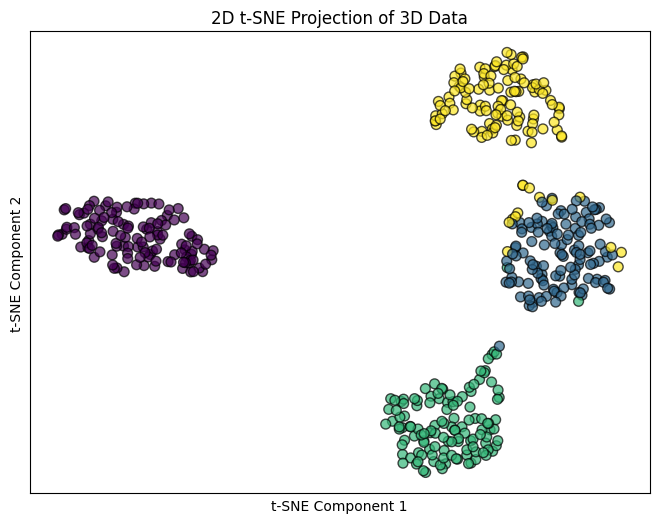

In [9]:
# Let's plot the 2D t-SNE result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

- t-SNE projected the data into four distinct clusters, although the original data had some overlap between a few clusters.
- You can see that some of the points ended up in the "wrong" cluster, although to be fair, t-SNE has no knowledge of which clusters the points actually belong to.
- All the clusters have similar densities.
- Two of the blobs are distinct from each other but "gave up" some of their points to the blob they originally had overlapped with.
- A "perfect" result would not completely separate the overlaps between blobs.
- Notice that the distance between the blobs is consistent with the degree to which they were originally separated.

### Compare UMAP and PCA dimensionality reduction to two dimensions

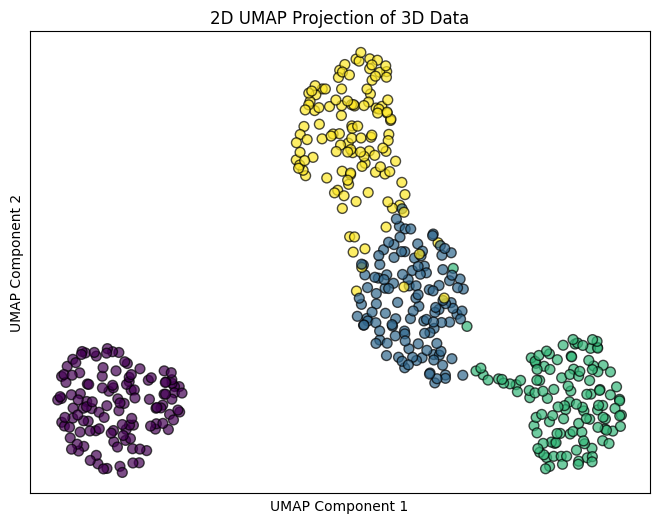

In [10]:
# Apply UMAP to reduce the dimensionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

# Plot the 2D UMAP projection result 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()


- UMAP correctly projected the data into four partially distinct clusters, with one cluster completely distinct from the others.
- Unlike t-SNE, it has preserved the connectedness that the original data had with the partially overlapping clusters.
- You can see that, like t-SNE, some of the points ended up in the "wrong" cluster.
- Again, like t-SNE, all the clusters have similar densities.
- A "perfect" result would not completely separate the overlaps between blobs, because they actually do overlap in the original feature space.
- The distance between the clusters is again consistent with the degree to which they were originally separated.

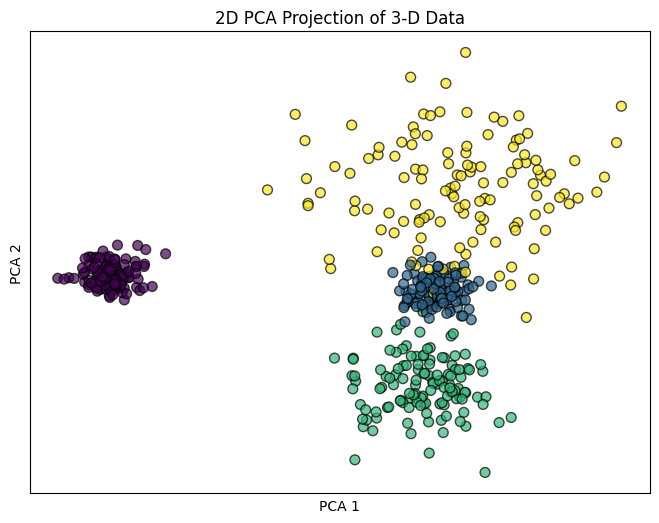

In [11]:
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8, 6))

# Plot the 2D PCA result (right)
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

- PCA faithfully preserved the relative blob densities.
- PCA also preserved the relative separation between blobs.
- The distance between the clusters is very consistent with the degree to which they were originally separated.
- PCA and t-SNE took very little time to complete compared to UMAP.
- IMNSHO, PCA outperformed both t-SNE and UMAP in this experiment.
This points to a common tendency to want to implement more advanced algorithms.
The default result is not always an improvement over the simpler established methods.